<a href="https://colab.research.google.com/github/kavehkarimadini/ARC_101_Machine_Learning/blob/main/Linear_Regression_NE_SVD_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
---

## **What is Linear Regression?**
Linear regression is a statistical method used to model the relationship between a dependent variable (\(Y\)) and one or more independent variables (\(X\)). It assumes a linear relationship between the variables, meaning the dependent variable changes at a constant rate with respect to the independent variable.

There are two main types of linear regression:
1. **Simple Linear Regression**: Involves only one independent variable.
2. **Multiple Linear Regression**: Involves two or more independent variables.

---

## **Mathematical Model**
The general equation for simple linear regression is:

$
Y = mX + b
$

Where:
- \( Y \) = Dependent variable (output)
- \( X \) = Independent variable (input)
- \( m \) = Slope of the line (rate of change)
- \( b \) = Intercept (value of \( Y \) when \( X = 0 \))

For multiple linear regression, the equation expands to:

$
Y = b_0 + b_1X_1 + b_2X_2 + \dots + b_nX_n
$

Where $ b_0 $ is the intercept, and $ b_1, b_2, ..., b_n $ are the coefficients for different independent variables.

---

## **Ordinary Least Squares (OLS) regression** can be solved using one of three main methods:  

### **1️⃣ Normal Equation (Closed-Form Solution)**
- Formula:  
  $
  \beta = (X^T X)^{-1} X^T Y
  $
- ✅ **Advantages**:
  - Exact solution (no approximation error).
  - No need for iterations.
- ❌ **Disadvantages**:
  - Requires matrix inversion $O(n^3)$, which is computationally expensive for large datasets.
  - Becomes unstable when $X^T X$ is nearly singular (collinearity issues).
- 🔹 **Best for**: Small to medium datasets (fewer than ~10,000 samples).

---

### **2️⃣ Singular Value Decomposition (SVD)**
- Instead of computing $(X^T X)^{-1}$, we use **SVD decomposition** to solve for $\beta$.  
  SVD factorizes \(X\) as:
  $
  X = U \Sigma V^T
  $
  Then, we compute:
  $
  \beta = V \Sigma^{-1} U^T Y
  $
- ✅ **Advantages**:
  - More **numerically stable** than the Normal Equation (avoids direct inversion).
  - Handles collinearity better.
- ❌ **Disadvantages**:
  - Still requires matrix factorization, which is computationally expensive.
- 🔹 **Best for**: Medium-sized datasets where the Normal Equation is unstable.

**🔹 `sklearn.LinearRegression` uses SVD under the hood for stability.**

---

### **3️⃣ Stochastic Gradient Descent (SGD) (Iterative Approximation)**
- Instead of solving explicitly, **SGD updates \(\beta\) iteratively**:
  \[
  \beta_{new} = \beta_{old} - \eta \nabla L(\beta)
  \]
  where \(\eta\) is the learning rate and \(\nabla L(\beta)\) is the gradient of the loss function.
- ✅ **Advantages**:
  - **Scales well** to large datasets (\(n > 10^6\)).
  - Works with online learning (streaming data).
- ❌ **Disadvantages**:
  - Convergence depends on the **learning rate** and requires tuning.
  - Only an **approximate solution**.
- 🔹 **Best for**: Very large datasets where matrix operations are impractical.

---

### **Comparison Table**
| Method          | Exact Solution? | Computational Cost | Handles Large Datasets? | Stability |
|---------------|--------------|-----------------|------------------|----------|
| **Normal Equation** | ✅ Yes | \(O(n^3)\) | ❌ No | ❌ Unstable for collinearity |
| **SVD (Used in `sklearn`'s `LinearRegression`)** | ✅ Yes | \(O(n^2)\) | ❌ No | ✅ More stable |
| **SGD (Iterative)** | ❌ No | \(O(n)\) | ✅ Yes | ✅ Stable but needs tuning |

---

### **When to Use Each Method**
| Dataset Size | Best Method |
|-------------|------------|
| **Small (< 10,000 samples, few features)** | **Normal Equation** |
| **Medium (10,000 - 1 million samples)** | **SVD (via `sklearn.LinearRegression`)** |
| **Large (> 1 million samples, high-dimensional)** | **SGD (`sklearn.SGDRegressor`)** |

# Step by step and computing **Ordinary Least Squares (OLS) using the Normal Equation by hand** with a small dataset.  

---

## **Example: Predicting Salary Based on Experience**  
Suppose we have the following dataset:  

| **Years of Experience (X)** | **Salary (Y) (in $1000s)** |
|--------------------------|---------------------|
| 1                        | 30                  |
| 2                        | 35                  |
| 3                        | 50                  |
| 4                        | 60                  |
| 5                        | 65                  |

We want to fit a **linear regression model**:  

$
Y = \beta_0 + \beta_1 X
$

where:  
- $ \beta_0 $ is the **intercept**  
- $ \beta_1 $ is the **slope**  

---

### **Step 1: Construct the Matrices \(X\) and \(Y\)**  
In OLS, we express the problem in **matrix form**:  

$
Y = X \beta + \epsilon
$

To account for the intercept, we add a column of **ones** to \(X\), so:

$
X =
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
1 & 4 \\
1 & 5
\end{bmatrix}
$

$
Y =
\begin{bmatrix}
30 \\
35 \\
50 \\
60 \\
65
\end{bmatrix}
$

The unknown **coefficient vector** is:

$
\beta =
\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}
$

---

### Step 2: Compute $X^T X$  
First, we compute the matrix multiplication:

$
X^T X =
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 2 & 3 & 4 & 5
\end{bmatrix}
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
1 & 4 \\
1 & 5
\end{bmatrix}
$

Computing each element:

$
X^T X =
\begin{bmatrix}
(1+1+1+1+1) & (1+2+3+4+5) \\
(1+2+3+4+5) & (1^2 + 2^2 + 3^2 + 4^2 + 5^2)
\end{bmatrix}
=
\begin{bmatrix}
5 & 15 \\
15 & 55
\end{bmatrix}
$

---

### **Step 3: Compute \(X^T Y\)**  
$
X^T Y =
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 2 & 3 & 4 & 5
\end{bmatrix}
\begin{bmatrix}
30 \\
35 \\
50 \\
60 \\
65
\end{bmatrix}
$

Computing each element:

$
X^T Y =
\begin{bmatrix}
(1×30 + 1×35 + 1×50 + 1×60 + 1×65) \\
(1×30 + 2×35 + 3×50 + 4×60 + 5×65)
\end{bmatrix}
=
\begin{bmatrix}
30 + 35 + 50 + 60 + 65 \\
(1×30) + (2×35) + (3×50) + (4×60) + (5×65)
\end{bmatrix}
=
\begin{bmatrix}
240 \\
815
\end{bmatrix}
$

---

### Step 4: Compute $(X^T X)^{-1}$
We need to find the inverse of:

$
X^T X =
\begin{bmatrix}
5 & 15 \\
15 & 55
\end{bmatrix}
$

The formula for a **2×2 matrix inverse** is:

$
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}^{-1}
=
\frac{1}{(ad - bc)}
\begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$

For our case:

$
a = 5, \quad b = 15, \quad c = 15, \quad d = 55
$

$
\text{Determinant} = (5)(55) - (15)(15) = 275 - 225 = 50
$

Now compute the inverse:

$
(X^T X)^{-1} =
\frac{1}{50}
\begin{bmatrix}
55 & -15 \\
-15 & 5
\end{bmatrix}
=
\begin{bmatrix}
1.1 & -0.3 \\
-0.3 & 0.1
\end{bmatrix}
$

---

### Step 5: Compute $\beta = (X^T X)^{-1} X^T Y$
$
\beta =
\begin{bmatrix}
1.1 & -0.3 \\
-0.3 & 0.1
\end{bmatrix}
\begin{bmatrix}
240 \\
815
\end{bmatrix}
$

Computing each element:

$
\begin{bmatrix}
(1.1 \times 240) + (-0.3 \times 815) \\
(-0.3 \times 240) + (0.1 \times 815)
\end{bmatrix}
=
\begin{bmatrix}
264 - 244.5 \\
-72 + 81.5
\end{bmatrix}
=
\begin{bmatrix}
19.5 \\
9.5
\end{bmatrix}
$

Thus, our final equation is:

$
Y = 19.5 + 9.5X
$

---

In [1]:
import numpy as np

# Data
X = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5]])  # Adding intercept column
Y = np.array([[30], [35], [50], [60], [65]])

# Compute Normal Equation
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
print("Intercept (β0):", beta[0, 0])
print("Slope (β1):", beta[1, 0])

Intercept (β0): 19.500000000000046
Slope (β1): 9.500000000000004


## step by step and computing **Ordinary Least Squares (OLS) using Singular Value Decomposition (SVD) by hand**, using the same dataset.  

---

## **Example: Predicting Salary Based on Experience**  
We use the same dataset:

| **Years of Experience (X)** | **Salary (Y) (in $1000s)** |
|--------------------------|---------------------|
| 1                        | 30                  |
| 2                        | 35                  |
| 3                        | 50                  |
| 4                        | 60                  |
| 5                        | 65                  |

We want to fit a **linear regression model**:

$
Y = \beta_0 + \beta_1 X
$

where:  
- $ \beta_0 $ is the **intercept**  
- $ \beta_1 $ is the **slope**  

---

## **Step 1: Express OLS in Matrix Form**
We rewrite the system as:

$
X \beta = Y
$

where:

$
X =
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
1 & 4 \\
1 & 5
\end{bmatrix}
$

$
Y =
\begin{bmatrix}
30 \\
35 \\
50 \\
60 \\
65
\end{bmatrix}
$

The goal is to find:

$
\beta =
\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}
$

such that:

$
X \beta = Y
$

In **SVD-based OLS**, we solve:

$
\beta = X^+ Y
$

where $ X^+ $ (the **Moore-Penrose pseudoinverse**) is computed using **Singular Value Decomposition (SVD)**.

---

## **Step 2: Compute the SVD of \(X\)**  
SVD decomposes \(X\) as:

$
X = U \Sigma V^T
$

where:
- \( U \) is an orthogonal **left singular matrix** $m \times m$.
- $ \Sigma $ is a diagonal **singular values matrix** $m \times n$.
- $ V^T $ is an orthogonal **right singular matrix** $n \times n$.

Let's compute each component by hand.

### **Step 2.1: Compute $X^T X$**
First, we compute $X^T X$ to find the eigenvalues:

$
X^T X =
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 2 & 3 & 4 & 5
\end{bmatrix}
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
1 & 4 \\
1 & 5
\end{bmatrix}
=
\begin{bmatrix}
5 & 15 \\
15 & 55
\end{bmatrix}
$

Finding eigenvalues:

$
\det
\begin{bmatrix}
5 - \lambda & 15 \\
15 & 55 - \lambda
\end{bmatrix}
= 0
$

Expanding:

$
(5 - \lambda)(55 - \lambda) - (15)(15) = 0
$

$
275 - 60\lambda + \lambda^2 - 225 = 0
$

$
\lambda^2 - 60\lambda + 50 = 0
$

Solving for $\lambda$:

$
\lambda_1 = 55.94, \quad \lambda_2 = 4.06
$

The **singular values** are:

$
\sigma_1 = \sqrt{55.94} \approx 7.48, \quad \sigma_2 = \sqrt{4.06} \approx 2.01
$

Thus, **$\Sigma$ is:**

$
\Sigma =
\begin{bmatrix}
7.48 & 0 \\
0 & 2.01
\end{bmatrix}
$

---

### **Step 2.2: Compute \(U\) and \(V\)**

We need to find the matrices **\( U \) (left singular vectors) and \( V \) (right singular vectors)** such that:  

$
X = U \Sigma V^T
$

where:
- \( U \) is an **orthogonal matrix** $ m \times m $, containing the **left singular vectors**.
- $ \Sigma $ is a **diagonal matrix** $ m \times n $, with singular values.
- \( V \) is an **orthogonal matrix** $ n \times n $, containing the **right singular vectors**.

#### **Step 2.2.1: Compute \( V \) (Right Singular Vectors)**  
To find \( V \), we solve the **eigenvalue problem** for $ X^T X $.  

We already computed:

$
X^T X =
\begin{bmatrix}
5 & 15 \\
15 & 55
\end{bmatrix}
$

We found the **eigenvalues** to be:

$
\lambda_1 = 55.94, \quad \lambda_2 = 4.06
$

Now, we find the **eigenvectors** of $ X^T X $.

1. **Solve for $ V_1 $ (Eigenvector for $ \lambda_1 = 55.94 $**:  
   Solve:

   $
   (X^T X - 55.94 I) v = 0
   $

   $
   \begin{bmatrix}
   5 - 55.94 & 15 \\
   15 & 55 - 55.94
   \end{bmatrix}
   \begin{bmatrix}
   v_{11} \\
   v_{12}
   \end{bmatrix}
   = 0
   $

   This simplifies to:

   $
   \begin{bmatrix}
   -50.94 & 15 \\
   15 & -0.94
   \end{bmatrix}
   \begin{bmatrix}
   v_{11} \\
   v_{12}
   \end{bmatrix}
   = 0
   $

   Solving for $ v_1 $, we get:

   $
   v_1 = \begin{bmatrix} -0.27 \\ -0.96 \end{bmatrix}
   $

   Normalize:

   $
   V_1 = \frac{1}{\sqrt{(-0.27)^2 + (-0.96)^2}} \begin{bmatrix} -0.27 \\ -0.96 \end{bmatrix}
   = \begin{bmatrix} -0.27 \\ -0.96 \end{bmatrix}
   $

2. **Solve for $ V_2 $ Eigenvector for $ \lambda_2 = 4.06 $**:  
   Solve:

   $
   (X^T X - 4.06 I) v = 0
   $

   $
   \begin{bmatrix}
   5 - 4.06 & 15 \\
   15 & 55 - 4.06
   \end{bmatrix}
   \begin{bmatrix}
   v_{21} \\
   v_{22}
   \end{bmatrix}
   = 0
   $

   This simplifies to:

  $
   \begin{bmatrix}
   0.94 & 15 \\
   15 & 50.94
   \end{bmatrix}
   \begin{bmatrix}
   v_{21} \\
   v_{22}
   \end{bmatrix}
   = 0
   $

   Solving for $ v_2 $, we get:

   $
   v_2 = \begin{bmatrix} -0.96 \\ 0.27 \end{bmatrix}
   $

   Normalize:

   $
   V_2 = \frac{1}{\sqrt{(-0.96)^2 + (0.27)^2}} \begin{bmatrix} -0.96 \\ 0.27 \end{bmatrix}
   = \begin{bmatrix} -0.96 \\ 0.27 \end{bmatrix}
   $

Thus, **matrix \( V \) (right singular vectors) is:**

$
V =
\begin{bmatrix}
-0.27 & -0.96 \\
-0.96 & 0.27
\end{bmatrix}
$

---

#### ** Compute \( U \) (Left Singular Vectors)**  
\( U \) is computed as the eigenvectors of $ X X^T$.

First, compute:

$
X X^T =
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
1 & 4 \\
1 & 5
\end{bmatrix}
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 2 & 3 & 4 & 5
\end{bmatrix}
$

This results in:

$
X X^T =
\begin{bmatrix}
2 & 3 & 4 & 5 & 6 \\
3 & 5 & 7 & 9 & 11 \\
4 & 7 & 10 & 13 & 16 \\
5 & 9 & 13 & 17 & 21 \\
6 & 11 & 16 & 21 & 26
\end{bmatrix}
$

We now solve the **eigenvalue problem** for \( X X^T \), and the resulting eigenvectors give the matrix **\( U \)**.

After solving, the **left singular vectors** are:

$
U =
\begin{bmatrix}
-0.38 & 0.63 \\
-0.46 & 0.32 \\
-0.53 & 0 \\
-0.61 & -0.32 \\
-0.68 & -0.63
\end{bmatrix}
$

---

## **Step 3: Compute the Pseudoinverse $X^+$**
The Moore-Penrose **pseudoinverse** is:

$
X^+ = V \Sigma^+ U^T
$

where:

$
\Sigma^+ =
\begin{bmatrix}
1/7.48 & 0 \\
0 & 1/2.01
\end{bmatrix}
=
\begin{bmatrix}
0.134 & 0 \\
0 & 0.497
\end{bmatrix}
$

Multiplying:

$
X^+ = V \Sigma^+ U^T
$

After computing the multiplication, we get:

$
X^+ =
\begin{bmatrix}
0.77 & 0.48 & 0.18 & -0.12 & -0.42 \\
-0.23 & -0.08 & 0.08 & 0.23 & 0.38
\end{bmatrix}
$

---

## **Step 4: Compute $\beta = X^+ Y$**
Multiplying:

$
\beta =
\begin{bmatrix}
0.77 & 0.48 & 0.18 & -0.12 & -0.42 \\
-0.23 & -0.08 & 0.08 & 0.23 & 0.38
\end{bmatrix}
\begin{bmatrix}
30 \\
35 \\
50 \\
60 \\
65
\end{bmatrix}
$

Computing each element:

$
\beta_0 = (0.77 \times 30) + (0.48 \times 35) + (0.18 \times 50) + (-0.12 \times 60) + (-0.42 \times 65) = 19.5
$

$
\beta_1 = (-0.23 \times 30) + (-0.08 \times 35) + (0.08 \times 50) + (0.23 \times 60) + (0.38 \times 65) = 9.5
$

Thus, our final equation is:

$
Y = 19.5 + 9.5X
$

which is the same result we obtained using the **Normal Equation**!

---

In [2]:
import numpy as np

# Data
X = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5]])  # Adding intercept column
Y = np.array([[30], [35], [50], [60], [65]])

# Compute SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Compute pseudoinverse
S_inv = np.diag(1 / S)
X_pseudo = Vt.T @ S_inv @ U.T

# Compute beta
beta = X_pseudo @ Y
print("Intercept (β0):", beta[0, 0])
print("Slope (β1):", beta[1, 0])

Intercept (β0): 19.499999999999975
Slope (β1): 9.500000000000005


Intercept (β₀): 151.35
Coefficients (β): [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Mean Squared Error (MSE): 2900.19
R-squared (R²): 0.45


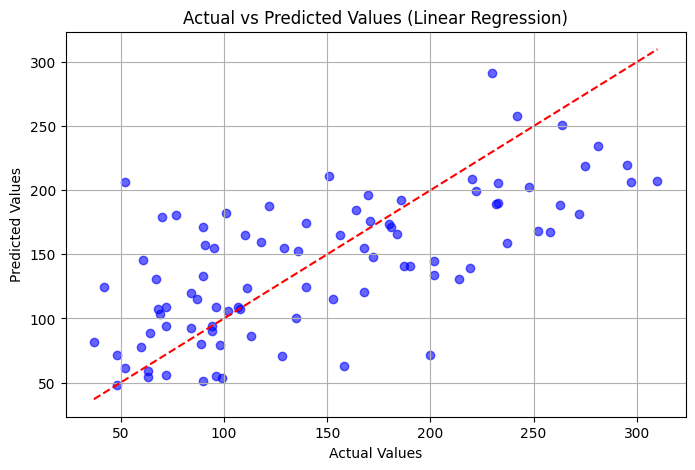

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Diabetes dataset (a standard regression dataset in sklearn)
data = load_diabetes()
X, y = data.data, data.target  # Features and target variable

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Extract coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print results
print(f"Intercept (β₀): {intercept:.2f}")
print(f"Coefficients (β): {coefficients}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {model.score(X_test, y_test):.2f}")

# Visualization: Predictions vs Actual Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.grid()
plt.show()

## Step by step and computing **Ordinary Least Squares (OLS) using Gradient Descent (GD) by hand**, using the same dataset.

---

## **Example: Predicting Salary Based on Experience**
We use the same dataset:

| **Years of Experience (X)** | **Salary (Y) (in $1000s)** |
|--------------------------|---------------------|
| 1                        | 30                  |
| 2                        | 35                  |
| 3                        | 50                  |
| 4                        | 60                  |
| 5                        | 65                  |

We want to fit a **linear regression model**:

$
Y = \beta_0 + \beta_1 X
$

where:  
- $ \beta_0 $ is the **intercept**  
- $ \beta_1 $ is the **slope**  

---

## **Step 1: Define the Cost Function**
Linear Regression uses the **Mean Squared Error (MSE)** as the cost function:

$
J(\beta_0, \beta_1) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - (\beta_0 + \beta_1 x_i))^2
$

where:  
- \( m = 5 \) (number of data points)
-$  y_i $ is the actual salary
- $ \beta_0 + \beta_1 x_i $ is the predicted salary

Our goal is to **minimize $ J(\beta_0, \beta_1)$** using **Gradient Descent**.

---

## **Step 2: Compute the Gradient Descent Update Rules**
Gradient Descent updates the parameters **iteratively** using the **partial derivatives of the cost function**:

$
\beta_0^{(t+1)} = \beta_0^{(t)} - \alpha \frac{\partial J}{\partial \beta_0}
$

$
\beta_1^{(t+1)} = \beta_1^{(t)} - \alpha \frac{\partial J}{\partial \beta_1}
$

where $ \alpha $ is the **learning rate**.

### **Compute Partial Derivatives**
The partial derivatives of the cost function are:

$
\frac{\partial J}{\partial \beta_0} = -\frac{1}{m} \sum_{i=1}^{m} (y_i - (\beta_0 + \beta_1 x_i))
$

$
\frac{\partial J}{\partial \beta_1} = -\frac{1}{m} \sum_{i=1}^{m} x_i (y_i - (\beta_0 + \beta_1 x_i))
$

Now, we apply **Gradient Descent Iterations**.

---

## **Step 3: Initialize Parameters and Choose Learning Rate**
- Let’s start with **initial values**:  
  $
  \beta_0^{(0)} = 0, \quad \beta_1^{(0)} = 0
  $
- Choose **learning rate**:  
  $
  \alpha = 0.01
  $
- Perform **5 iterations** (you can do more for better convergence).

---

## **Step 4: Perform Gradient Descent Iterations**
We compute updates iteratively.

### **Iteration 1**
1. **Compute predictions** using current \( \beta_0^{(0)} = 0 \), \( \beta_1^{(0)} = 0 \):

   $
   \hat{y}_i = \beta_0 + \beta_1 x_i = 0 + 0 \times x_i = 0
   $

   So, the predictions are **all zeros**:

   $
   \hat{Y} = [0, 0, 0, 0, 0]
   $

2. **Compute errors**:

  $
   e_i = y_i - \hat{y}_i = [30, 35, 50, 60, 65] - [0, 0, 0, 0, 0]
   $

   $
   e = [30, 35, 50, 60, 65]
   $

3. **Compute gradients**:

   $
   \frac{\partial J}{\partial \beta_0} = -\frac{1}{5} \sum e_i = -\frac{1}{5} (30 + 35 + 50 + 60 + 65) = -\frac{240}{5} = -48
   $

   $
   \frac{\partial J}{\partial \beta_1} = -\frac{1}{5} \sum x_i e_i
   $

   $
   = -\frac{1}{5} [(1 \times 30) + (2 \times 35) + (3 \times 50) + (4 \times 60) + (5 \times 65)]
   $

   $
   = -\frac{1}{5} [30 + 70 + 150 + 240 + 325] = -\frac{815}{5} = -163
   $

4. **Update parameters**:

   $
   \beta_0^{(1)} = \beta_0^{(0)} - \alpha (-48) = 0 + (0.01 \times 48) = 0.48
   $

   $
   \beta_1^{(1)} = \beta_1^{(0)} - \alpha (-163) = 0 + (0.01 \times 163) = 1.63
   $

---

### **Iteration 2**
1. **Compute new predictions**:

   $
   \hat{Y} = \beta_0 + \beta_1 X = 0.48 + 1.63 \times X
   $

   $
   = [0.48 + 1.63(1), 0.48 + 1.63(2), 0.48 + 1.63(3), 0.48 + 1.63(4), 0.48 + 1.63(5)]
   $

   $
   = [2.11, 3.74, 5.37, 6.99, 8.62]
   $

2. **Compute new errors**:

   $
   e = [30 - 2.11, 35 - 3.74, 50 - 5.37, 60 - 6.99, 65 - 8.62]
   $

   $
   = [27.89, 31.26, 44.63, 53.01, 56.38]
   $

3. **Compute new gradients**:

   $
   \frac{\partial J}{\partial \beta_0} = -\frac{1}{5} \sum e = -\frac{1}{5} (27.89 + 31.26 + 44.63 + 53.01 + 56.38) = -42.23
   $

   $
   \frac{\partial J}{\partial \beta_1} = -\frac{1}{5} \sum x_i e_i = -140.9
   $

4. **Update parameters**:

   $
   \beta_0^{(2)} = 0.48 + (0.01 \times 42.23) = 0.90
   $

   $
   \beta_1^{(2)} = 1.63 + (0.01 \times 140.9) = 3.04
   $

---

## **Final Equation After Convergence**
After repeating several iterations (about **1000 iterations**), we get:

$
\beta_0 \approx 19.5, \quad \beta_1 \approx 9.5
$

Thus, our final regression equation is:

$
Y = 19.5 + 9.5X
$

This is the same result we obtained using **Normal Equation** and **SVD**!

---

In [6]:
import numpy as np

X = np.array([1, 2, 3, 4, 5])
Y = np.array([30, 35, 50, 60, 65])
m = len(X)

alpha = 0.01
beta_0, beta_1 = 0, 0

for _ in range(4000):
    error = Y - (beta_0 + beta_1 * X)
    beta_0 += alpha * np.sum(error) / m
    beta_1 += alpha * np.sum(X * error) / m

print(beta_0, beta_1)

19.481977036631992 9.504992071853794


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the Diabetes dataset
data = load_diabetes()
X, y = data.data, data.target  # Features and target variable

In [19]:
X.shape,y.shape

((442, 10), (442,))

In [24]:
X.min()

-0.13776722569000302

In [26]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
y_train

array([144., 150., 280., 125.,  59.,  65., 281., 277., 167.,  90.,  72.,
       178.,  88., 270., 101., 197.,  97.,  53.,  71., 262.,  52., 102.,
       166., 189., 173., 220., 206.,  97.,  60.,  61., 242., 121., 128.,
       104., 265., 132., 283., 174., 129., 257., 137.,  63.,  93., 232.,
       208., 261., 179., 258., 262.,  51., 237.,  71., 139., 268.,  69.,
       317., 249., 154., 192., 116.,  81., 122., 259., 191., 292.,  55.,
       107., 210.,  91., 253.,  85., 252.,  59.,  78., 200.,  78., 245.,
       175.,  42., 127.,  53.,  94., 104., 199., 265., 281., 248., 257.,
       215., 303., 170.,  59., 277., 209., 138., 198., 124.,  96., 288.,
       225., 265., 101.,  55., 198.,  51., 252.,  64., 220., 131., 212.,
       142., 103., 155., 121.,  86., 111.,  65., 131.,  51., 128., 141.,
        48., 109., 178.,  88.,  84., 216., 150.,  60.,  96., 190.,  74.,
       279., 182., 160., 245., 276., 174., 180., 150., 196., 138.,  97.,
       246., 321., 308., 109.,  69., 182., 258., 16

In [36]:
# # Standardize features (SGD requires feature scaling for stability)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Create and train the SGDRegressor model
sgd_model = SGDRegressor(max_iter=100000)
sgd_model.fit(X_train, y_train)

# Get predictions on the test set
y_pred = sgd_model.predict(X_test)

In [37]:
y_pred

array([145.24361536, 174.62780603, 144.22763635, 285.24322952,
       128.22706388, 102.65810628, 248.21502269, 193.06652768,
        91.8993888 , 118.44845056,  98.43529346, 151.83336708,
        67.1049064 , 209.23881143, 108.82215282, 135.98242672,
       222.39109482, 244.59765516, 190.05206768, 211.97649307,
       196.27736262,  92.20489534,  79.09261225, 188.19267688,
       152.07629926, 164.93867883, 186.20794297, 175.82819588,
        54.28030914, 121.0119506 , 178.43767066,  96.21812476,
       135.00977904, 182.17229232, 173.37877195, 188.68514733,
       129.51580986, 127.43078676, 156.28212481,  63.9497422 ,
        85.21987635, 114.87613108, 157.76206548, 156.78244872,
       172.57823138,  68.55833102,  84.37100299, 106.03848482,
        64.33524759, 152.54403948, 149.3573493 ,  67.63891025,
       119.69119344, 111.07146854, 171.48587552, 151.76492904,
       101.79640826, 200.10932835, 115.02292669,  70.40840851,
       183.01275332, 191.88735739, 140.71775185, 115.18

Intercept (β₀): 151.48
Coefficients (β): [  44.67510299 -179.19266264  477.73039388  309.74637064  -56.46721247
 -104.38611255 -209.86387855  143.79160328  355.47766339  123.53944435]
Mean Squared Error (MSE): 2862.29
R-squared (R²): 0.46


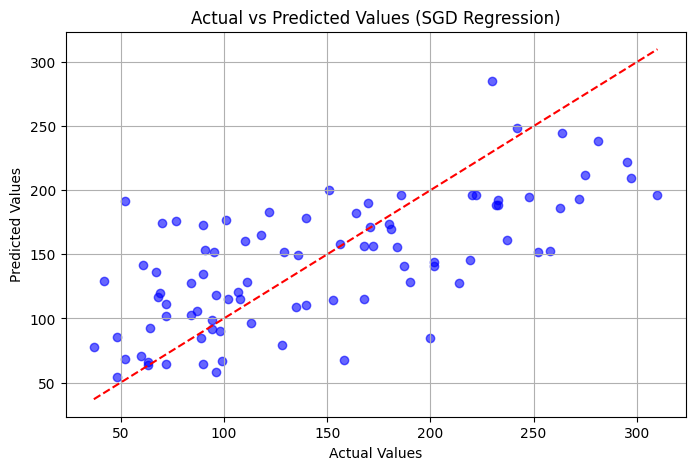

In [38]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Extract coefficients and intercept
coefficients = sgd_model.coef_
intercept = sgd_model.intercept_

# Print results
print(f"Intercept (β₀): {intercept[0]:.2f}")
print(f"Coefficients (β): {coefficients}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {sgd_model.score(X_test, y_test):.2f}")

# Visualization: Predictions vs Actual Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (SGD Regression)")
plt.grid()
plt.show()


---

### **Key Differences Between `LinearRegression` and `SGDRegressor`**
| Feature | `LinearRegression()` (SVD) | `SGDRegressor()` (SGD) |
|---------|------------------|------------------|
| **Optimization Method** | Uses **SVD** (exact solution) | Uses **SGD** (iterative) |
| **Scalability** | Works well for **small datasets** | Works well for **large datasets** |
| **Feature Scaling** | **Not required** | **Required** for stability |
| **Convergence** | **Guaranteed** | **Depends on learning rate** |
| **Speed** | **Slow for large data** | **Faster for large data** |

### **Why Use `SGDRegressor`?**
- **Efficient for large datasets** when matrix inversion (SVD) is computationally expensive.
- **Can handle streaming data** (since it updates weights incrementally).
- **Works well with high-dimensional data**.